In [100]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from OpenGoddard.optimize import Problem, Guess, Condition, Dynamics
import pandas as pd
from scipy.integrate import solve_ivp
import random as rd

In [129]:
class Particle:
    #single particle
    def __init__(self):
        self.x0 = rd.random()
        self.y0 = rd.random()
        
        self.xf = rd.random()
        self.yf = rd.random()
        
        #define inertia
        self.m = 1;
        
        #define max speed, force
        self.vmax = 5;
        self.Fmax = 1;
        
        
    def __str__(self):
        return ('From ({0:2.2f},{1:2.2f}) to ({2:2.2f},{3:2.2f})'.format(self.x0,self.y0, self.xf,self.yf))

class Particles:
    #collection of particles
    
    def __init__(self,N=2):
        self.N = N #number of particles
        
        #generate particles
        self.list_of_particles = [];
        
        for i in range(self.N):
            self.list_of_particles.append(Particle())
    
    def print_particles(self):
        [print(p) for p in self.list_of_particles]
        return
    
    def plot_particles(self):
        plt.figure()
        for i in range(self.N):
            plt.plot([self.list_of_particles[i].x0,self.list_of_particles[i].xf],[self.list_of_particles[i].y0,self.list_of_particles[i].yf],'--')
            plt.plot([self.list_of_particles[i].x0],[self.list_of_particles[i].y0],'o')
    def __str__(self):
        return ('Set of {} Particle(s)'.format(self.N))


In [130]:
p=Particles()

In [131]:
print(p.list_of_particles[1])

From (0.28,0.31) to (0.09,0.47)


In [132]:
p.N

2

In [137]:
obj=Particles(N=10)

In [138]:
print(obj)

Set of 10 Particle(s)


In [141]:
obj.print_particles()

From (0.87,0.74) to (0.71,0.96)
From (0.93,0.31) to (0.59,0.17)
From (0.78,0.21) to (0.21,0.91)
From (0.86,0.87) to (0.21,0.23)
From (0.13,0.77) to (0.16,0.67)
From (0.74,0.48) to (0.79,0.77)
From (0.44,0.76) to (0.74,0.73)
From (0.42,0.61) to (0.16,0.61)
From (0.54,0.01) to (0.59,0.77)
From (0.74,0.50) to (0.57,0.76)


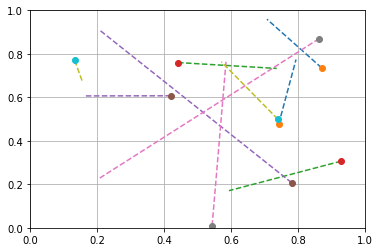

In [144]:
obj.plot_particles()
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

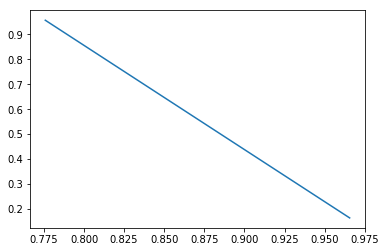

In [68]:
plt.plot([obj.list_of_particles[0].x0,obj.list_of_particles[0].xf],[obj.list_of_particles[0].y0,obj.list_of_particles[0].yf])

In [ ]:

def dynamics(prob,obj,section):
    
    N = obj.N;
    
    #prob contains state, each particle has x and y. 
    #control is vx and vy
    
    
    
    dx = Dynamics(prob, section)
    return dx()

def equality(prob, obj):
    
    R     = prob.states_all_section(0)
    
    result = Condition()

    # event condition
    result.equal(R[0], obj.Re)
    
    return result

def inequality(prob, obj):
    
    R     = prob.states_all_section(0)
    
    result = Condition()

    # event condition
    result.lower(R[0], obj.Re)
    
    return result



def cost(prob, obj):
    m = prob.states_all_section(4)
    # return -m[-1]
    # ==== Caution ====
    # cost function should be near 1.0
    return -m[-1] / prob.unit_states[0][4]


